In [1]:
import numpy as np
import pandas as pd
#import Scikit-learn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
#import data csv
df = pd.read_csv('../Datasets/INTC Historical Data.csv')

#print data 
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,36.60,36.61,36.93,36.27,20.20M,0.91%
1,1/4/2017,36.41,36.71,36.77,36.34,15.92M,-0.52%
2,1/5/2017,36.35,36.45,36.72,36.30,13.99M,-0.16%
3,1/6/2017,36.48,36.46,36.68,36.19,15.11M,0.36%
4,1/9/2017,36.61,36.48,36.88,36.48,19.46M,0.36%


In [3]:
#in ra thông tin thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1624 non-null   object 
 1   Price     1624 non-null   float64
 2   Open      1624 non-null   float64
 3   High      1624 non-null   float64
 4   Low       1624 non-null   float64
 5   Vol.      1624 non-null   object 
 6   Change %  1624 non-null   object 
dtypes: float64(4), object(3)
memory usage: 88.9+ KB


In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,36.60,36.61,36.93,36.27,20.20M,0.91%
1,1/4/2017,36.41,36.71,36.77,36.34,15.92M,-0.52%
2,1/5/2017,36.35,36.45,36.72,36.30,13.99M,-0.16%
3,1/6/2017,36.48,36.46,36.68,36.19,15.11M,0.36%
4,1/9/2017,36.61,36.48,36.88,36.48,19.46M,0.36%
...,...,...,...,...,...,...,...
1619,6/9/2023,31.34,31.93,31.99,30.68,40.23M,-1.51%
1620,6/12/2023,33.07,31.40,33.30,31.36,59.67M,5.52%
1621,6/13/2023,33.91,33.77,33.95,33.07,51.82M,2.54%
1622,6/14/2023,35.58,33.87,35.60,33.80,74.05M,4.92%


In [5]:
#Bỏ dòng bị trống dự liệu
df = df.dropna()
#Chuyển đổi dữ liệu cột Vol. sang số
df['Vol.'] = df['Vol.'].str.replace('M', '').astype(float) * 1000000


In [6]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,36.60,36.61,36.93,36.27,20200000.0,0.91%
1,1/4/2017,36.41,36.71,36.77,36.34,15920000.0,-0.52%
2,1/5/2017,36.35,36.45,36.72,36.30,13990000.0,-0.16%
3,1/6/2017,36.48,36.46,36.68,36.19,15110000.0,0.36%
4,1/9/2017,36.61,36.48,36.88,36.48,19460000.0,0.36%
...,...,...,...,...,...,...,...
1619,6/9/2023,31.34,31.93,31.99,30.68,40230000.0,-1.51%
1620,6/12/2023,33.07,31.40,33.30,31.36,59670000.0,5.52%
1621,6/13/2023,33.91,33.77,33.95,33.07,51820000.0,2.54%
1622,6/14/2023,35.58,33.87,35.60,33.80,74050000.0,4.92%


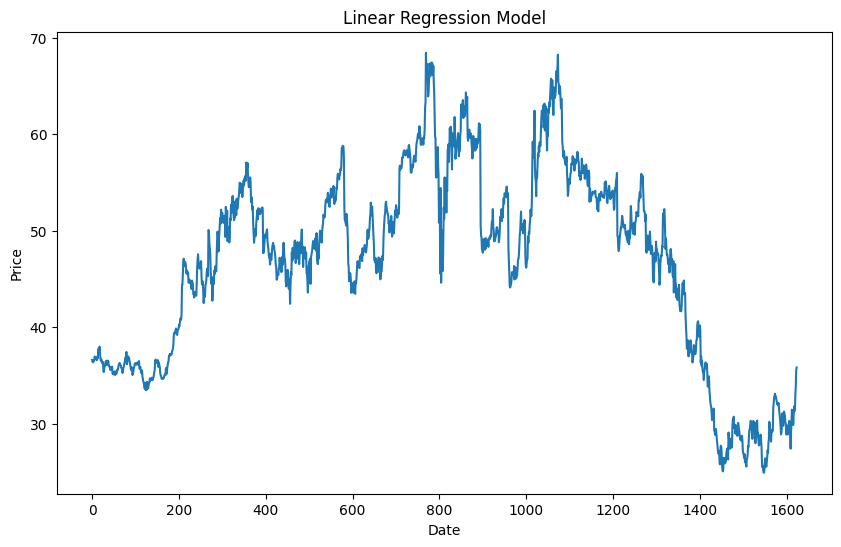

In [7]:


figure=df['Price'].values
plt.figure(figsize=(10,6))
plt.plot(figure)
plt.xlabel('Date')
plt.ylabel('Price') 
plt.title('Linear Regression Model')
plt.show()

In [8]:
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [9]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [10]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred_test = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [11]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[73.09179236 73.1135917  73.13539104 73.15719038 73.17898972 73.20078907
 73.22258841 73.24438775 73.26618709 73.28798643 73.30978577 73.33158512
 73.35338446 73.3751838  73.39698314 73.41878248 73.44058183 73.46238117
 73.48418051 73.50597985 73.52777919 73.54957853 73.57137788 73.59317722
 73.61497656 73.6367759  73.65857524 73.68037459 73.70217393 73.72397327]


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Regression metrics
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mse = mean_squared_error(y_val, y_pred_val)
valid_mae = mean_absolute_error(y_val, y_pred_val)

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)

Testing RMSE: 19.214617766759748
Testing MSE: 369.20153592267934
Testing MAE: 15.519588451629737
Validation RMSE: 42.21428411211679
Validation MSE: 1782.045783098516
Validation MAE: 42.17602547079279


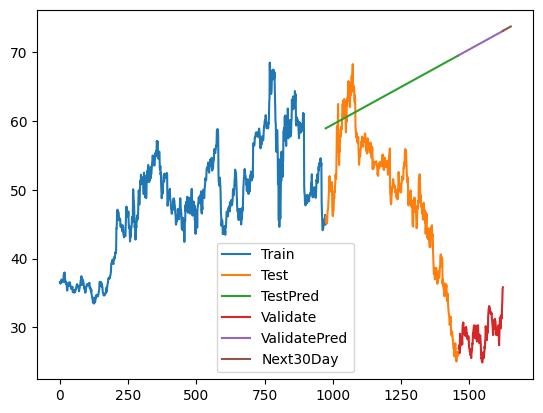

In [13]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred_test)

plt.plot(val_data.index, val_data['Price'])

plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'TestPred', 'Validate', 'ValidatePred', 'Next30Day'])
plt.show()